## Predicting Book Genres using NLP

<center>
<img src="ipynb.images/nlp.png" width=500 />  
</center>

Here we are showcasing computer vision techniques to predict a book’s genre. 
So I had to find a way to convert that problem statement into text-based data

But books are not one-dimensional. One book can span several genres. Now THAT is a challenge !!!

### Import the required libraries

><b>We will start by importing the libraries necessary to our project:</b>

In [14]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

%matplotlib inline
pd.set_option('display.max_colwidth', 300)

><b>Load Data</b> :
Let’s load the book metadata file first

In [15]:
meta = pd.read_csv("data/booksummaries.csv", header = None)

There’s a LOT of information in such a tiny space:<br/>
    <li>book id</li>
    <li>book name</li>
    <li>book author</li>
    <li>book genres (multiple)</li>
    <li>book summary</li>

In [16]:
meta.head()

,0,1,2,3,4,5,6
0,620,/m/0hhy,Animal Farm,George Orwell,8/17/1945,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"": ""Satire"", ""/m/0dwly"": ""Children's literature"", ""/m/014dfn"": ""Speculative fiction"", ""/m/02xlf"": ""Fiction""}","Old Major, the old boar on the Manor Farm, calls the animals on the farm for a meeting, where he compares the humans to parasites and teaches the animals a revolutionary song, 'Beasts of England'. When Major dies, two young pigs, Snowball and Napoleon, assume command and turn his dream into a p..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""Novella"", ""/m/014dfn"": ""Speculative fiction"", ""/m/0c082"": ""Utopian and dystopian fiction"", ""/m/06nbt"": ""Satire"", ""/m/02xlf"": ""Fiction""}","Alex, a teenager living in near-future England, leads his gang on nightly orgies of opportunistic, random ""ultra-violence."" Alex's friends (""droogs"" in the novel's Anglo-Russian slang, Nadsat) are: Dim, a slow-witted bruiser who is the gang's muscle; Georgie, an ambitious second-in-command; and..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fiction"", ""/m/0pym5"": ""Absurdist fiction"", ""/m/05hgj"": ""Novel""}","The text of The Plague is divided into five parts. In the town of Oran, thousands of rats, initially unnoticed by the populace, begin to die in the streets. A hysteria develops soon afterward, causing the local newspapers to report the incident. Authorities responding to public pressure order t..."
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,"The argument of the Enquiry proceeds by a series of incremental steps, separated into chapters which logically succeed one another. After expounding his epistemology, Hume explains how to apply his principles to specific topics. In the first section of the Enquiry, Hume provides a rough introdu..."
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""Speculative fiction"", ""/m/01hmnh"": ""Fantasy"", ""/m/02xlf"": ""Fiction""}","The novel posits that space around the Milky Way is divided into concentric layers called Zones, each being constrained by different laws of physics and each allowing for different degrees of biological and technological advancement. The innermost, the ""Unthinking Depths"", surrounds the galacti..."


><b>Clean the unnecessary part by dropping columns</b>

In [17]:
meta.drop(columns=[1,4],inplace=True)
meta.dropna(inplace=True)

In [18]:
meta

,0,2,3,5,6
0,620,Animal Farm,George Orwell,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"": ""Satire"", ""/m/0dwly"": ""Children's literature"", ""/m/014dfn"": ""Speculative fiction"", ""/m/02xlf"": ""Fiction""}","Old Major, the old boar on the Manor Farm, calls the animals on the farm for a meeting, where he compares the humans to parasites and teaches the animals a revolutionary song, 'Beasts of England'. When Major dies, two young pigs, Snowball and Napoleon, assume command and turn his dream into a p..."
1,843,A Clockwork Orange,Anthony Burgess,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""Novella"", ""/m/014dfn"": ""Speculative fiction"", ""/m/0c082"": ""Utopian and dystopian fiction"", ""/m/06nbt"": ""Satire"", ""/m/02xlf"": ""Fiction""}","Alex, a teenager living in near-future England, leads his gang on nightly orgies of opportunistic, random ""ultra-violence."" Alex's friends (""droogs"" in the novel's Anglo-Russian slang, Nadsat) are: Dim, a slow-witted bruiser who is the gang's muscle; Georgie, an ambitious second-in-command; and..."
2,986,The Plague,Albert Camus,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fiction"", ""/m/0pym5"": ""Absurdist fiction"", ""/m/05hgj"": ""Novel""}","The text of The Plague is divided into five parts. In the town of Oran, thousands of rats, initially unnoticed by the populace, begin to die in the streets. A hysteria develops soon afterward, causing the local newspapers to report the incident. Authorities responding to public pressure order t..."
4,2080,A Fire Upon the Deep,Vernor Vinge,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""Speculative fiction"", ""/m/01hmnh"": ""Fantasy"", ""/m/02xlf"": ""Fiction""}","The novel posits that space around the Milky Way is divided into concentric layers called Zones, each being constrained by different laws of physics and each allowing for different degrees of biological and technological advancement. The innermost, the ""Unthinking Depths"", surrounds the galacti..."
5,2152,All Quiet on the Western Front,Erich Maria Remarque,"{""/m/098tmk"": ""War novel"", ""/m/016lj8"": ""Roman \u00e0 clef""}","The book tells the story of Paul Bäumer, a German soldier who—urged on by his school teacher—joins the German army shortly after the start of World War I. Bäumer arrives at the Western Front with his friends and schoolmates (Tjaden, Müller, Kropp and a number of other characters). There they me..."
...,...,...,...,...,...
16549,36372465,The Third Lynx,Timothy Zahn,"{""/m/06n90"": ""Science Fiction""}","The story starts with former government agent, Frank Compton, meeting a young man who drops dead at his feet. Compton finds a ticket to a strange, interstellar train called the Quadrail. During Compton's ride on the Quadrail he falls asleep, and wakes up in the custody of the spiders, the opera..."
16551,36534061,Remote Control,Andy McNab,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction"", ""/m/0c3351"": ""Suspense""}","The series follows the character of Nick Stone, an ex-military man who previously worked for the SAS, British Intelligence, and an American agency. Stone now works as a paid mercenary, willing to work in even the most difficult circumstances. The series has Stone dealing with assassination, pol..."
16555,37054020,Transfer of Power,Vince Flynn,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction""}","The reader first meets Rapp while he is doing a covert operation in Iran and he discovers a possible terrorist attack planned for the nations capital to happen in the near future. Meanwhile in Washington, D.C., Anna Reilly is starting her first day as a White House correspondent for NBC. It als..."
16556,37122323,Decoded,Jay-Z,"{""/m/0xdf"": ""Autobiography""}","The book follows very rough chronological order, while switching from current stories to his story of growing up in the Marcy projects. The autobiographical portion focuses on not only his story of drug dealing, fight

><b>Let’s add column names to the aforementioned variables:</b>

In [19]:
meta.columns = ["book_id","book_name","book_author","genre","summary"]

In [20]:
meta.head()

,book_id,book_name,book_author,genre,summary
0,620,Animal Farm,George Orwell,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"": ""Satire"", ""/m/0dwly"": ""Children's literature"", ""/m/014dfn"": ""Speculative fiction"", ""/m/02xlf"": ""Fiction""}","Old Major, the old boar on the Manor Farm, calls the animals on the farm for a meeting, where he compares the humans to parasites and teaches the animals a revolutionary song, 'Beasts of England'. When Major dies, two young pigs, Snowball and Napoleon, assume command and turn his dream into a p..."
1,843,A Clockwork Orange,Anthony Burgess,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""Novella"", ""/m/014dfn"": ""Speculative fiction"", ""/m/0c082"": ""Utopian and dystopian fiction"", ""/m/06nbt"": ""Satire"", ""/m/02xlf"": ""Fiction""}","Alex, a teenager living in near-future England, leads his gang on nightly orgies of opportunistic, random ""ultra-violence."" Alex's friends (""droogs"" in the novel's Anglo-Russian slang, Nadsat) are: Dim, a slow-witted bruiser who is the gang's muscle; Georgie, an ambitious second-in-command; and..."
2,986,The Plague,Albert Camus,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fiction"", ""/m/0pym5"": ""Absurdist fiction"", ""/m/05hgj"": ""Novel""}","The text of The Plague is divided into five parts. In the town of Oran, thousands of rats, initially unnoticed by the populace, begin to die in the streets. A hysteria develops soon afterward, causing the local newspapers to report the incident. Authorities responding to public pressure order t..."
4,2080,A Fire Upon the Deep,Vernor Vinge,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""Speculative fiction"", ""/m/01hmnh"": ""Fantasy"", ""/m/02xlf"": ""Fiction""}","The novel posits that space around the Milky Way is divided into concentric layers called Zones, each being constrained by different laws of physics and each allowing for different degrees of biological and technological advancement. The innermost, the ""Unthinking Depths"", surrounds the galacti..."
5,2152,All Quiet on the Western Front,Erich Maria Remarque,"{""/m/098tmk"": ""War novel"", ""/m/016lj8"": ""Roman \u00e0 clef""}","The book tells the story of Paul Bäumer, a German soldier who—urged on by his school teacher—joins the German army shortly after the start of World War I. Bäumer arrives at the Western Front with his friends and schoolmates (Tjaden, Müller, Kropp and a number of other characters). There they me..."


In [21]:
meta['genre'][0]

'{"/m/016lj8": "Roman \\u00e0 clef", "/m/06nbt": "Satire", "/m/0dwly": "Children\'s literature", "/m/014dfn": "Speculative fiction", "/m/02xlf": "Fiction"}'

><b>Data cleaning : Removing NaN values</b>

In [22]:
meta.dropna(inplace=True)

We will take the help of the json library here: 

We can’t access the genres in this row by using just .values( ). Can you guess why? This is because this text is a string, not a dictionary. We will have to convert this string into a dictionary which makes ease of access this row’s genres

In [23]:
# an empty list
genres = [] 

# extract genres
for i in meta['genre']: 
    genres.append(list(json.loads(i).values()))
    
meta['genre_new'] = genres

Let’s take a look at the dataframe once again:

In [24]:
meta.head()

,book_id,book_name,book_author,genre,summary,genre_new
0,620,Animal Farm,George Orwell,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"": ""Satire"", ""/m/0dwly"": ""Children's literature"", ""/m/014dfn"": ""Speculative fiction"", ""/m/02xlf"": ""Fiction""}","Old Major, the old boar on the Manor Farm, calls the animals on the farm for a meeting, where he compares the humans to parasites and teaches the animals a revolutionary song, 'Beasts of England'. When Major dies, two young pigs, Snowball and Napoleon, assume command and turn his dream into a p...","[Roman à clef, Satire, Children's literature, Speculative fiction, Fiction]"
1,843,A Clockwork Orange,Anthony Burgess,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""Novella"", ""/m/014dfn"": ""Speculative fiction"", ""/m/0c082"": ""Utopian and dystopian fiction"", ""/m/06nbt"": ""Satire"", ""/m/02xlf"": ""Fiction""}","Alex, a teenager living in near-future England, leads his gang on nightly orgies of opportunistic, random ""ultra-violence."" Alex's friends (""droogs"" in the novel's Anglo-Russian slang, Nadsat) are: Dim, a slow-witted bruiser who is the gang's muscle; Georgie, an ambitious second-in-command; and...","[Satire, Speculative fiction, Novella, Utopian and dystopian fiction, Science Fiction, Fiction]"
2,986,The Plague,Albert Camus,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fiction"", ""/m/0pym5"": ""Absurdist fiction"", ""/m/05hgj"": ""Novel""}","The text of The Plague is divided into five parts. In the town of Oran, thousands of rats, initially unnoticed by the populace, begin to die in the streets. A hysteria develops soon afterward, causing the local newspapers to report the incident. Authorities responding to public pressure order t...","[Existentialism, Novel, Absurdist fiction, Fiction]"
4,2080,A Fire Upon the Deep,Vernor Vinge,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""Speculative fiction"", ""/m/01hmnh"": ""Fantasy"", ""/m/02xlf"": ""Fiction""}","The novel posits that space around the Milky Way is divided into concentric layers called Zones, each being constrained by different laws of physics and each allowing for different degrees of biological and technological advancement. The innermost, the ""Unthinking Depths"", surrounds the galacti...","[Fiction, Speculative fiction, Science Fiction, Fantasy, Hard science fiction]"
5,2152,All Quiet on the Western Front,Erich Maria Remarque,"{""/m/098tmk"": ""War novel"", ""/m/016lj8"": ""Roman \u00e0 clef""}","The book tells the story of Paul Bäumer, a German soldier who—urged on by his school teacher—joins the German army shortly after the start of World War I. Bäumer arrives at the Western Front with his friends and schoolmates (Tjaden, Müller, Kropp and a number of other characters). There they me...","[Roman à clef, War novel]"


In [25]:
len(genres)

12055

In [26]:
all_genres = sum(genres,[])
print(len(set(all_genres)))
#print(all_genres)

221


There are over 221 unique genre tags in our dataset. That is quite a big number. I can hardy recall 5-6 genres! Let’s find out what are these tags. We will use FreqDist( ) from the nltk library to create a dictionary of genres and their occurrence count across the dataset:

In [27]:
all_genres = nltk.FreqDist(all_genres)

In [28]:
all_genres

FreqDist({'Fiction': 4714, 'Speculative fiction': 4292, 'Science Fiction': 2725, 'Novel': 2379, 'Fantasy': 2323, "Children's literature": 1999, 'Mystery': 1358, 'Suspense': 761, 'Young adult literature': 736, 'Crime Fiction': 732, ...})

In [29]:
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})

In [30]:
all_genres_df

,Count,Genre
0,2,Literary criticism
1,15,Vampire fiction
2,17,Picaresque novel
3,9,Regency romance
4,13,Business
...,...,...
216,2,Polemic
217,1,Experimental literature
218,4,Subterranean fiction
219,40,Bildungsroman


Visualizing the data is a much better method than simply putting out numbers. So, let’s plot the distribution of the books genres:

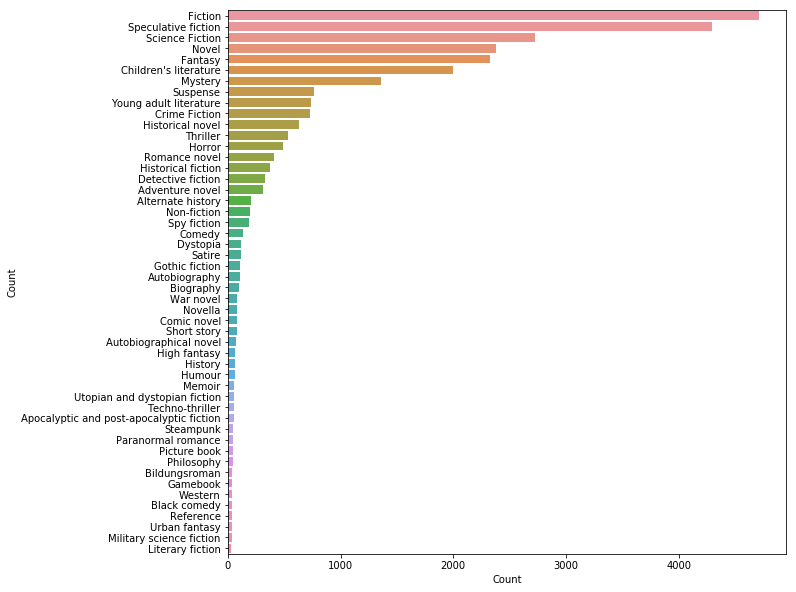

In [31]:
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(10,10)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()

Next, we will clean our data a bit. I will use some very basic text cleaning steps -

In [32]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    return text

Let’s apply the function on the books plots by using the lambda function:

In [33]:
meta['clean_summary'] = meta['summary'].apply(lambda x: clean_text(x))

In [34]:
meta.head()

,book_id,book_name,book_author,genre,summary,genre_new,clean_summary
0,620,Animal Farm,George Orwell,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"": ""Satire"", ""/m/0dwly"": ""Children's literature"", ""/m/014dfn"": ""Speculative fiction"", ""/m/02xlf"": ""Fiction""}","Old Major, the old boar on the Manor Farm, calls the animals on the farm for a meeting, where he compares the humans to parasites and teaches the animals a revolutionary song, 'Beasts of England'. When Major dies, two young pigs, Snowball and Napoleon, assume command and turn his dream into a p...","[Roman à clef, Satire, Children's literature, Speculative fiction, Fiction]",old major the old boar on the manor farm calls the animals on the farm for a meeting where he compares the humans to parasites and teaches the animals a revolutionary song beasts of england when major dies two young pigs snowball and napoleon assume command and turn his dream into a philosophy t...
1,843,A Clockwork Orange,Anthony Burgess,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""Novella"", ""/m/014dfn"": ""Speculative fiction"", ""/m/0c082"": ""Utopian and dystopian fiction"", ""/m/06nbt"": ""Satire"", ""/m/02xlf"": ""Fiction""}","Alex, a teenager living in near-future England, leads his gang on nightly orgies of opportunistic, random ""ultra-violence."" Alex's friends (""droogs"" in the novel's Anglo-Russian slang, Nadsat) are: Dim, a slow-witted bruiser who is the gang's muscle; Georgie, an ambitious second-in-command; and...","[Satire, Speculative fiction, Novella, Utopian and dystopian fiction, Science Fiction, Fiction]",alex a teenager living in near future england leads his gang on nightly orgies of opportunistic random ultra violence alexs friends droogs in the novels anglo russian slang nadsat are dim a slow witted bruiser who is the gangs muscle georgie an ambitious second in command and pete who mostly pla...
2,986,The Plague,Albert Camus,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fiction"", ""/m/0pym5"": ""Absurdist fiction"", ""/m/05hgj"": ""Novel""}","The text of The Plague is divided into five parts. In the town of Oran, thousands of rats, initially unnoticed by the populace, begin to die in the streets. A hysteria develops soon afterward, causing the local newspapers to report the incident. Authorities responding to public pressure order t...","[Existentialism, Novel, Absurdist fiction, Fiction]",the text of the plague is divided into five parts in the town of oran thousands of rats initially unnoticed by the populace begin to die in the streets a hysteria develops soon afterward causing the local newspapers to report the incident authorities responding to public pressure order the colle...
4,2080,A Fire Upon the Deep,Vernor Vinge,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""Speculative fiction"", ""/m/01hmnh"": ""Fantasy"", ""/m/02xlf"": ""Fiction""}","The novel posits that space around the Milky Way is divided into concentric layers called Zones, each being constrained by different laws of physics and each allowing for different degrees of biological and technological advancement. The innermost, the ""Unthinking Depths"", surrounds the galacti...","[Fiction, Speculative fiction, Science Fiction, Fantasy, Hard science fiction]",the novel posits that space around the milky way is divided into concentric layers called zones each being constrained by different laws of physics and each allowing for different degrees of biological and technological advancement the innermost the unthinking depths surrounds the galactic core ...
5,2152,All Quiet on the Western Front,Erich Maria Remarque,"{""/m/098tmk"": ""War novel"", ""/m/016lj8"": ""Roman \u00e0 clef""}","The book tells the story of Paul Bäumer, a German soldier who—urged on by his school teacher—joins the German army shortly after the start of World War I. Bäumer arrives at the Western Front with his friends and schoolmates (Tjaden, Müller, Kropp and a n

In the clean_summary column, all the text is in lowercase and there are also no punctuation marks

The function below will visualize the words and their frequency in a set of documents. Let’s use it to find out the most frequent words in the books summary column:

In [35]:
def freq_words(x, terms = 20): 
    all_words = ' '.join([text for text in x]) 
    all_words = all_words.split() 
    fdist = nltk.FreqDist(all_words) 
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
    d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
    plt.figure(figsize=(12,15)) 
    ax = sns.barplot(data=d, x= "count", y = "word") 
    ax.set(ylabel = 'Word') 
    plt.show()

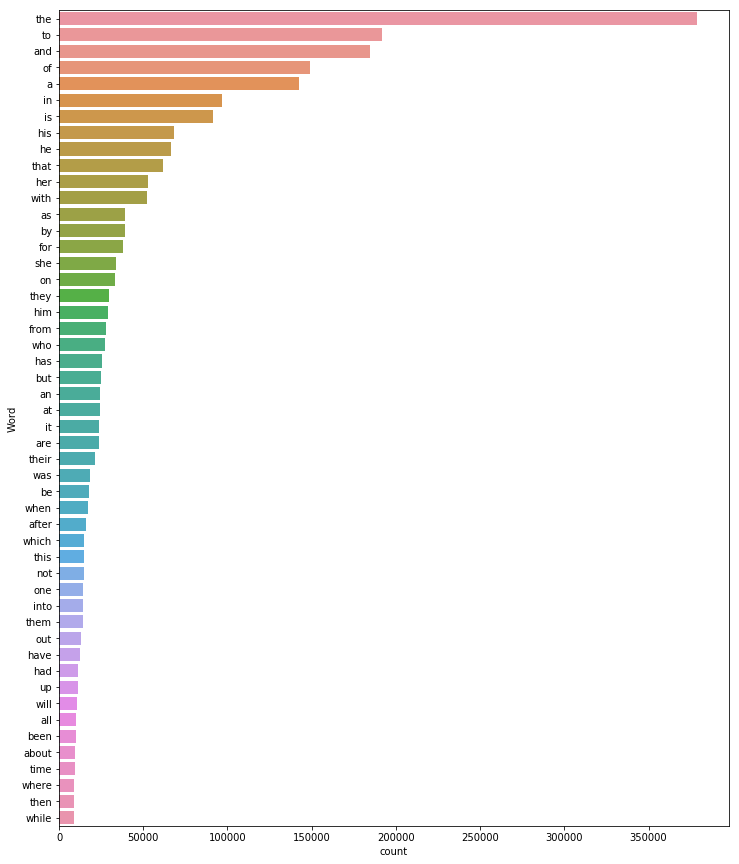

In [37]:
# print 50 most frequent words 
freq_words(meta['clean_summary'], 50)

Most of the terms in the above summary are stopwords. These stopwords carry far less meaning than other keywords in the text (they just add noise to the data). I’m going to go ahead and remove them from the summaries’ text. You can download the list of stopwords from the nltk library:

In [408]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\SHREE
[nltk_data]     GANESH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

><b>Let’s remove the stopwords:</b>

In [38]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)


{'mustn', 'up', "wasn't", 'yourselves', 'of', 'at', 'most', 'me', 'down', 'few', 'be', 'has', 'a', "you're", 'for', 'both', 've', 'y', 'does', 'there', 'so', "haven't", 'our', 'through', 'over', 'the', "that'll", 'no', "aren't", "mustn't", 'between', 'yours', 'them', 'than', 'isn', "didn't", "doesn't", 'own', "hadn't", 'if', 's', 'will', 'not', 'their', 'hers', 'any', 'can', 'only', 'd', 'off', 'further', 'was', 'whom', 'more', 'as', 'from', "needn't", 'they', 'this', 'with', 'during', 'how', 'don', 'below', 'above', 'himself', 'did', 'are', "you'll", "you'd", 'haven', 'such', "won't", "you've", 'have', 'but', 'aren', 'those', 'after', 'her', 'these', 'couldn', 'had', 'needn', "hasn't", 'ma', 'his', 'other', "mightn't", 'hasn', 'into', 'themselves', 'weren', "isn't", 'and', 'where', 'then', "she's", 'what', 'same', 'nor', 'is', 'who', 'about', 're', 'which', 'because', 'shouldn', 'your', 'do', 'or', "weren't", 'i', 'o', 'should', 'being', 'all', 'doesn', 'theirs', 'too', 'shan', 'very'

In [39]:
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

In [40]:
meta['clean_summary'] = meta['clean_summary'].apply(lambda x: remove_stopwords(x))

Check the most frequent terms without the stopwords:

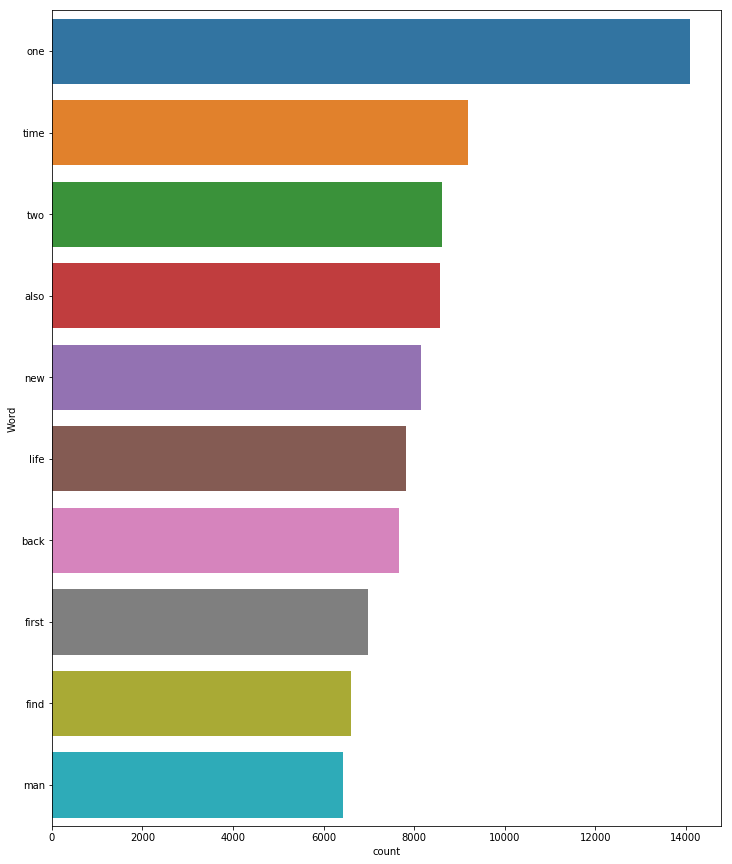

In [41]:
freq_words(meta['clean_summary'], 10)

### Converting Text to Features

Hence, we will now one hot encode the target variable, i.e., genre_new by using sklearn’s MultiLabelBinarizer( )

In [42]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(meta['genre_new'])

# transform target variable
y = multilabel_binarizer.transform(meta['genre_new'])

In [43]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Now, it’s time to turn our focus to extracting features from the cleaned version of the books summary data

In [44]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.1, max_features=10000)

In [45]:
tfidf_vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.1, max_features=10000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

Now, before creating TF-IDF features, we will split our data into train and validation sets for training and evaluating our model’s performance. I’m going with a 80-20 split – 80% of the data samples in the train set and the rest in the validation set:

In [47]:
# split dataset into training and validation set
xtrain, xval, ytrain, yval = train_test_split(meta['clean_summary'], y, test_size=0.2, random_state=9)

Now we can create features for the train and the validation set:

In [48]:
# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

As you can imagine, training 221 models can take a considerable amount of time on a modest system. Hence, I will build a Logistic Regression model as it is quick to train on limited computational power:

In [49]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

In [50]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [51]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Finally, fit the model on the train set:

In [52]:
# fit model on train data
clf.fit(xtrain_tfidf, ytrain)

c:\users\shree ganesh\.conda\envs\pymc3\lib\site-packages\sklearn\multiclass.py:75: UserWarning: Label not 21 is present in all training examples.
  str(classes[c]))
c:\users\shree ganesh\.conda\envs\pymc3\lib\site-packages\sklearn\multiclass.py:75: UserWarning: Label not 30 is present in all training examples.
  str(classes[c]))
c:\users\shree ganesh\.conda\envs\pymc3\lib\site-packages\sklearn\multiclass.py:75: UserWarning: Label not 56 is present in all training examples.
  str(classes[c]))
c:\users\shree ganesh\.conda\envs\pymc3\lib\site-packages\sklearn\multiclass.py:75: UserWarning: Label not 75 is present in all training examples.
  str(classes[c]))
c:\users\shree ganesh\.conda\envs\pymc3\lib\site-packages\sklearn\multiclass.py:75: UserWarning: Label not 78 is present in all training examples.
  str(classes[c]))
c:\users\shree ganesh\.conda\envs\pymc3\lib\site-packages\sklearn\multiclass.py:75: UserWarning: Label not 95 is present in all training examples.
  str(classes[c]))
c:\u

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

Predict book genres on the validation set:

In [53]:
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

In [54]:
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

We will use the inverse_transform( ) function along with the MultiLabelBinarizer( ) object to convert the predicted arrays into book genre tags

In [55]:
multilabel_binarizer.inverse_transform(y_pred)[150]

('Fiction',)

However, to evaluate our model’s overall performance, we need to take into consideration all the predictions and the entire target variable of the validation set:

In [56]:
# evaluate performance
f1_score(yval, y_pred, average="micro")

0.36782813728058683

Let’s try to change this threshold value and see if that improves our model’s score:

In [57]:
# predict probabilities
y_pred_prob = clf.predict_proba(xval_tfidf)

Now set a threshold value:

In [58]:
t = 0.3 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)

In [59]:
y_pred_new

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [60]:
# evaluate performance
f1_score(yval, y_pred_new, average="micro")

0.5310077519379846

In [61]:
multilabel_binarizer.inverse_transform(y_pred_new)[2]

('Science Fiction', 'Speculative fiction')

Our Books genre prediction system should be able to take a book summary in raw form as input and generate its genre tag(s).

let’s build an inference function:
    <li>Clean the text</li>
    <li>Remove stopwords from the cleaned text</li>
    <li>Extract features from the text</li>
    <li>Make predictions</li>
    <li>Return the predicted book genre tags</li>

In [62]:
def infer_tags(q):
    q = clean_text(q)
    q = remove_stopwords(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = clf.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred)

Let’s test this inference function on a few samples from our validation set:

In [65]:
for i in range(5): 
    k = xval.sample(1).index[0] 
    print("Books: ", meta['book_name'][k], "\nPredicted Genre: ", infer_tags(xval[k])), print("Actual genre: ",meta['genre_new'][k], "\n")

Books:  A Little Princess 
Predicted Genre:  [('Fiction',)]
Actual genre:  ['Speculative fiction', "Children's literature", 'Fiction'] 

Books:  The Great War: American Front 
Predicted Genre:  [()]
Actual genre:  ['Alternate history', 'Speculative fiction'] 

Books:  Captain Underpants and the Attack of the Talking Toilets 
Predicted Genre:  [("Children's literature",)]
Actual genre:  ["Children's literature", 'Humour'] 

Books:  The Hollow Chest 
Predicted Genre:  [()]
Actual genre:  ['Whodunit', 'Mystery'] 

Books:  The Beggar Queen 
Predicted Genre:  [('Speculative fiction',)]
Actual genre:  ["Children's literature", 'Speculative fiction', 'Fantasy', 'Fiction'] 

